# The data

In [1]:
df <- read.csv("transactionData.csv")

In [2]:
head(df)

,X,blockNumber,gas,gasPrice,executionGas,callDataUsage,callDataLength,nonce,to,from
,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,0,15627832,517689,57000000000,515877,1812,458,7235,6.973232e+47,6.994384e+47
2,1,15627832,517689,57000000000,515865,1824,458,3140,6.973232e+47,3.915221e+47
3,2,15627832,150000,30000000000,149356,644,138,11173680,7.785650e+47,1.436920e+48
4,3,15627832,71000,23214786296,71000,0,2,5293,4.956288e+47,4.956288e+47
5,4,15627832,500000,20000000000,498176,1824,458,1,6.973232e+47,4.249540e+47
6,5,15627832,469802,14090000000,458886,10916,2250,371,6.791231e+47,9.806636e+47


In [124]:
str(df)

'data.frame':	15006 obs. of  10 variables:
 $ X             : int  0 1 2 3 4 5 6 7 8 9 ...
 $ blockNumber   : int  15627832 15627832 15627832 15627832 15627832 15627832 15627832 15627832 15627832 15627832 ...
 $ gas           : int  517689 517689 150000 71000 500000 469802 189922 69905 350000 21000 ...
 $ gasPrice      : num  5.70e+10 5.70e+10 3.00e+10 2.32e+10 2.00e+10 ...
 $ executionGas  : int  515877 515865 149356 71000 498176 458886 189202 68961 350000 21000 ...
 $ callDataUsage : int  1812 1824 644 0 1824 10916 720 944 0 0 ...
 $ callDataLength: int  458 458 138 2 458 2250 266 138 2 2 ...
 $ nonce         : int  7235 3140 11173680 5293 1 371 353 93 6925018 377 ...
 $ to            : num  6.97e+47 6.97e+47 7.79e+47 4.96e+47 6.97e+47 ...
 $ from          : num  6.99e+47 3.92e+47 1.44e+48 4.96e+47 4.25e+47 ...


In [3]:
library(dplyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [4]:
df <-select(df,-X)

In [127]:
head(df)

,blockNumber,gas,gasPrice,executionGas,callDataUsage,callDataLength,nonce,to,from
,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,15627832,517689,57000000000,515877,1812,458,7235,6.973232e+47,6.994384e+47
2,15627832,517689,57000000000,515865,1824,458,3140,6.973232e+47,3.915221e+47
3,15627832,150000,30000000000,149356,644,138,11173680,7.785650e+47,1.436920e+48
4,15627832,71000,23214786296,71000,0,2,5293,4.956288e+47,4.956288e+47
5,15627832,500000,20000000000,498176,1824,458,1,6.973232e+47,4.249540e+47
6,15627832,469802,14090000000,458886,10916,2250,371,6.791231e+47,9.806636e+47


# EDAs

In [8]:
library(ggplot2)

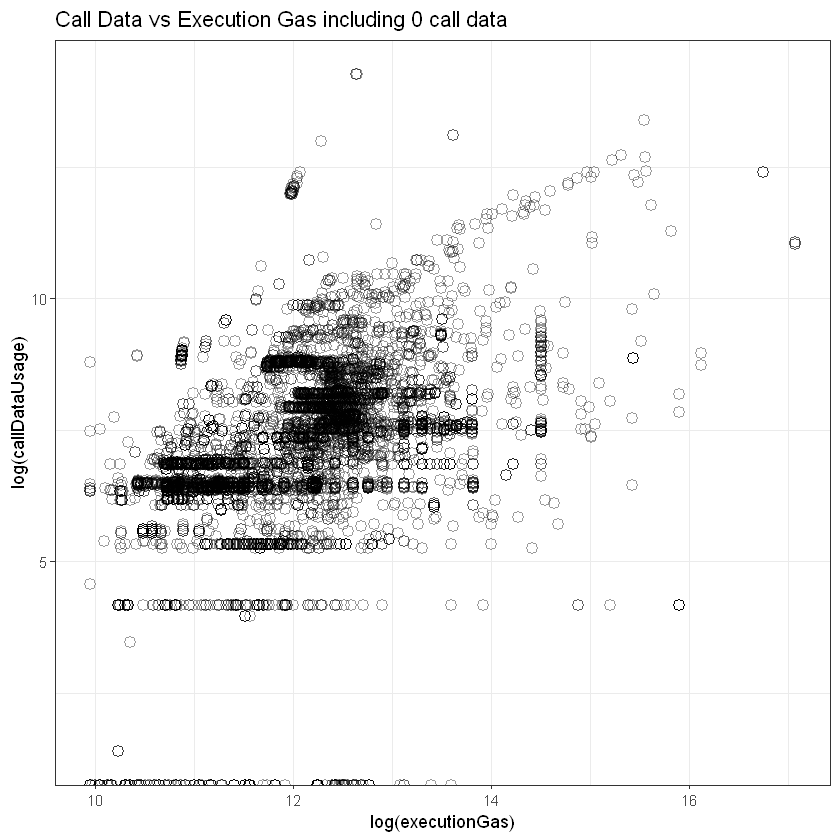

In [129]:
ggplot(df)  + 
  geom_point(aes(x = log(executionGas), y = log(callDataUsage)),shape=1,size=3,alpha=0.4) +theme_bw()+ ggtitle("Call Data vs Execution Gas including 0 call data")

In [6]:
group_callData <- function(x){
    if (x==0){
        return('0')
    }else if (x==64){
        return('64')
    }else if (x==204){
        return('204')
    }else if (x==216){
        return('216')
    }else if (x==264){
        return('264')
    }else if (x==608){
        return('608')
    }else if (x==644){
        return('644')
    }else if (x==680){
        return('680')
    }else if (x==976){
        return('976')
    }else if (x==1808){
        return('1808')
    }else if (x==1872){
        return('1872')
    }else if (x==1824){
        return('1824')
    }else{
        return('Other')      
    }
}

In [131]:
sapply(df$callDataUsage,group_callData)

[1] "Other" "1824"  "644"   "0"     "1824"  "Other" "Other" "Other" "0"    
   [10] "0"     "Other" "Other" "0"     "608"   "608"   "Other" "0"     "0"    
   [19] "608"   "0"     "Other" "Other" "Other" "Other" "Other" "0"     "Other"
   [28] "0"     "0"     "Other" "0"     "0"     "Other" "0"     "Other" "Other"
   [37] "Other" "0"     "0"     "0"     "Other" "64"    "64"    "204"   "204"  
   [46] "204"   "0"     "Other" "Other" "Other" "Other" "608"   "Other" "0"    
   [55] "Other" "Other" "Other" "Other" "0"     "Other" "0"     "Other" "Other"
   [64] "680"   "Other" "Other" "Other" "Other" "608"   "Other" "0"     "0"    
   [73] "Other" "Other" "Other" "Other" "0"     "0"     "Other" "Other" "Other"
   [82] "Other" "Other" "Other" "608"   "Other" "Other" "Other" "0"     "Other"
   [91] "Other" "204"   "Other" "Other" "Other" "Other" "0"     "0"     "Other"
  [100] "Other" "0"     "Other" "Other" "Other" "Other" "644"   "Other" "Other"
  [109] "Other" "Other" "0"     "Other" "Other" "Other" "Other" "64"    "Other"
  [118] "Other" "Other" "Other" "Other" "Other" "Other" "Other" "Other" "Other"
  [127] "0"     "Other" "Other" "Other" "0"     "Other" "Other" "0"     "Other"
  [136] "Other" "Other" "Other" "Other" "204"   "Other" "Other" "Other" "Other"
  [145] "Other" "Other" "Other" "Other" "Other" "Other" "Other" "Other" "Other"
  [154] "Other" "Other" "0"     "608"   "0"     "608"   "1872"  "Other" "Other"
  [163] "Other" "Other" "0"     "Other" "0"     "Other" "Other" "0"     "Other"
  [172] "Other" "Other" "Other" "Other" "Other" "Other" "Other" "0"     "0"    
  [181] "Other" "Other" "0"     "Other" "Other" "0"     "Other" "Other" "Other"
  [190] "Other" "Other" "Other" "Other" "0"     "0"     "204"   "0"     "64"   
  [199] "64"    "Other" "0"     "64"    "Other" "Other" "Other" "Other" "0"    
  [208] "0"     "Other" "Other" "0"     "0"     "Other" "Other" "Other" "Other"
  [217] "Other" "Other" "Other" "Other" "Other" "64"    "Other" "0"     "Other"
  [226] "Other" "Other" "0"     "Other" "Other" "Other" "Other" "Other" "Other"
  [235] "Other" "Other" "Other" "Other" "608"   "0"     "Other" "Other" "644"  
  [244] "0"     "Other" "608"   "Other" "0"     "Other" "0"     "Other" "Other"
  [253] "Other" "608"   "Other" "Other" "Other" "Other" "Other" "Other" "Other"
  [262] "Other" "Other" "Other" "0"     "0"     "644"   "Other" "Other" "Other"
  [271] "0"     "Other" "608"   "608"   "Other" "0"     "0"     "0"     "0"    
  [280] "0"     "Other" "0"     "0"     "204"   "0"     "Other" "Other" "Other"
  [289] "Other" "0"     "204"   "Other" "204"   "Other" "204"   "204"   "204"  
  [298] "Other" "204"   "64"    "204"   "204"   "Other" "64"    "Other" "Other"
  [307] "0"     "0"     "0"     "0"     "Other" "0"     "Other" "644"   "Other"
  [316] "Other" "Other" "Other" "Other" "0"     "0"     "0"     "Other" "Other"
  [325] "976"   "0"     "0"     "0"     "0"     "608"   "608"   "Other" "Other"
  [334] "Other" "Other" "Other" "Other" "0"     "0"     "Other" "0"     "0"    
  [343] "0"     "0"     "0"     "0"     "Other" "1824"  "Other" "644"   "Other"
  [352] "Other" "Other" "0"     "Other" "Other" "0"     "0"     "Other" "Other"
  [361] "Other" "Other" "608"   "0"     "Other" "204"   "Other" "Other" "Other"
  [370] "0"     "Other" "Other" "Other" "Other" "Other" "Other" "Other" "0"    
  [379] "Other" "Other" "Other" "0"     "Other" "0"     "0"     "1872"  "0"    
  [388] "0"     "Other" "Other" "Other" "Other" "Other" "Other" "Other" "Other"
  [397] "Other" "Other" "264"   "Other" "0"     "Other" "Other" "0"     "204"  
  [406] "Other" "Other" "Other" "608"   "Other" "Other" "Other" "Other" "Other"
  [415] "Other" "0"     "Other" "Other" "608"   "0"     "Other" "Other" "Other"
  [424] "Other" "Other" "Other" "Other" "Other" "Other" "Other" "Other" "Other"
  [433] "Other" "0"     "Other" "Other" "Other" "Other" "Other" "Other" "Other"
  [442] "608"   "Other" "Other" "608"   "Other" "Other" "Other" "Other" "608"  
  [4

In [7]:
df$callDataUsageGroups<-as.factor(sapply(df$callDataUsage,group_callData))

In [21]:
dim(df[df$callDataUsageGroups==0,])

[1] 3954   10

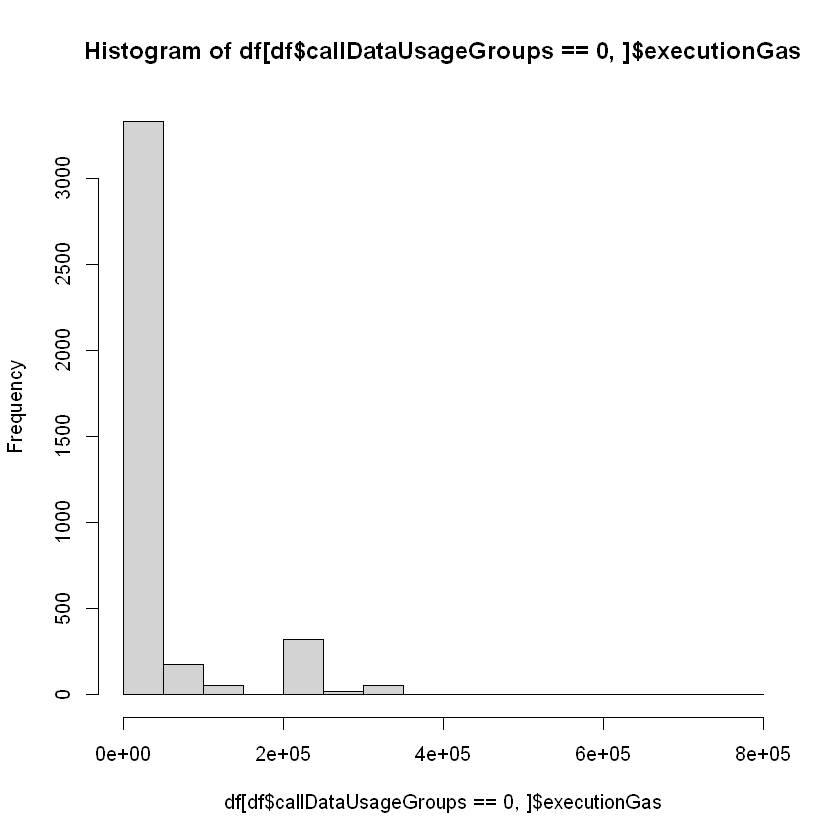

In [13]:
hist(df[df$callDataUsageGroups==0,]$executionGas)

In [17]:
filter(df[df$callDataUsageGroups==0,],executionGas==21000)

blockNumber,gas,gasPrice,executionGas,callDataUsage,callDataLength,nonce,to,from,callDataUsageGroups
<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<fct>
15627832,21000,12684754705,21000,0,2,377,1.163709e+48,6.656531e+47,0
15627832,21000,12024879396,21000,0,2,0,1.099532e+48,6.521621e+47,0
15627832,21000,11049029587,21000,0,2,195475,9.760641e+46,1.019231e+48,0
15627832,21000,10530000000,21000,0,2,0,6.279043e+47,8.437547e+47,0
15627832,21000,10530000000,21000,0,2,0,6.279043e+47,6.798924e+47,0
15627832,21000,9446061562,21000,0,2,549,9.782439e+47,9.844739e+46,0
15627832,21000,9046029587,21000,0,2,42,1.752052e+46,1.296803e+48,0
15627832,21000,8546029587,21000,0,2,0,1.096096e+48,8.470111e+47,0
15627832,21000,8546029587,21000,0,2,80,1.223233e+48,1.268732e+47,0


In [24]:
write.csv(filter(df[df$callDataUsageGroups==0,],executionGas==21000),'ZeroCallDataExgas21000.csv')

In [28]:
df[df$callDataUsageGroups==608,]

,blockNumber,gas,gasPrice,executionGas,callDataUsage,callDataLength,nonce,to,from,callDataUsageGroups
,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<fct>
14,15627832,350000,11517773766,349392,608,138,6925019,1.248875e+48,4.007900e+47,608
15,15627832,350000,11517773766,349392,608,138,6925020,1.248875e+48,4.007900e+47,608
19,15627832,120000,11049029587,119392,608,138,2,1.248875e+48,9.225720e+47,608
52,15627832,500000,9046029587,499392,608,138,1262736,1.248875e+48,7.872414e+47,608
69,15627832,50719,8556029587,50111,608,138,6501,1.248875e+48,6.962131e+47,608
85,15627832,99244,8546029587,98636,608,138,40,9.175511e+47,5.544981e+47,608
157,15627832,600000,7702024453,599392,608,138,138548,1.248875e+48,8.637673e+47,608
159,15627832,600000,8105077760,599392,608,138,138550,1.248875e+48,8.637673e+47,608
239,15627833,69163,7950096817,68555,608,138,11,1.248875e+48,1.403636e+48,608


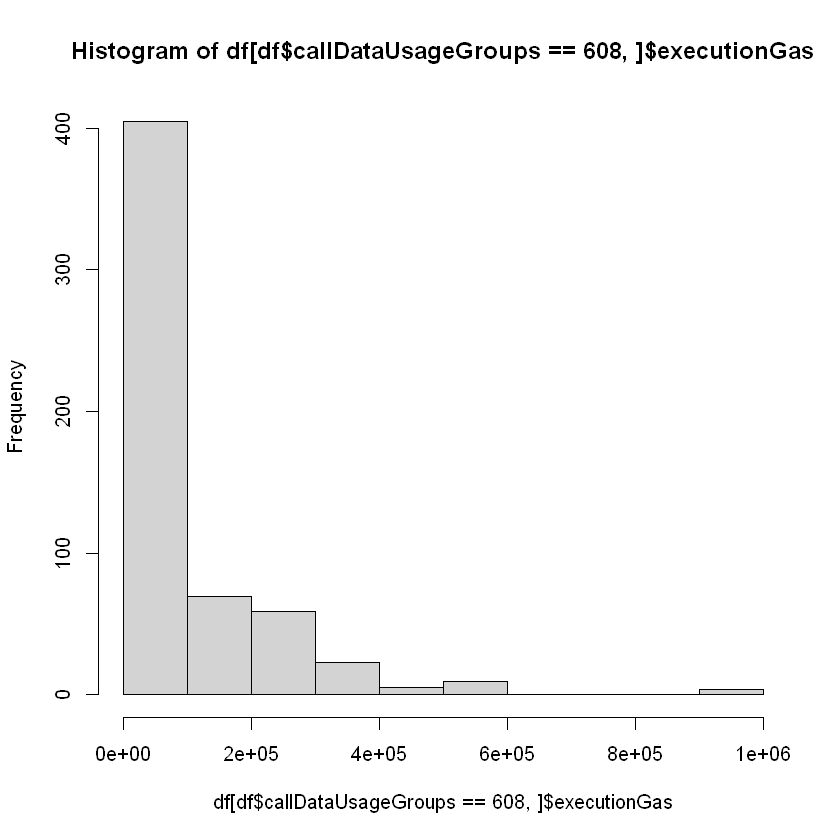

In [27]:
hist(df[df$callDataUsageGroups==608,]$executionGas)

In [38]:
filter(df[df$callDataUsageGroups==608,],executionGas<=2*50111)

blockNumber,gas,gasPrice,executionGas,callDataUsage,callDataLength,nonce,to,from,callDataUsageGroups
<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<fct>
15627832,50719,8556029587,50111,608,138,6501,1.248875e+48,6.962131e+47,608
15627832,99244,8546029587,98636,608,138,40,9.175511e+47,5.544981e+47,608
15627833,69163,7950096817,68555,608,138,11,1.248875e+48,1.403636e+48,608
15627834,90000,14000000000,89392,608,138,0,1.248875e+48,3.088909e+47,608
15627834,46109,8945915429,45501,608,138,11017,1.248875e+48,1.177238e+48,608
15627834,90000,8945915429,89392,608,138,93923,1.248875e+48,1.419342e+48,608
15627834,99244,8445915429,98636,608,138,1,9.175511e+47,4.877348e+47,608
15627834,73188,8445915429,72580,608,138,1,9.175511e+47,1.253280e+48,608
15627834,51352,8105077760,50744,608,138,0,4.703801e+46,9.168688e+47,608


In [40]:
write.csv(filter(df[df$callDataUsageGroups==608,],executionGas==50111),'608calldata.csv')

In [8]:
str(df)

'data.frame':	15006 obs. of  10 variables:
 $ blockNumber        : int  15627832 15627832 15627832 15627832 15627832 15627832 15627832 15627832 15627832 15627832 ...
 $ gas                : int  517689 517689 150000 71000 500000 469802 189922 69905 350000 21000 ...
 $ gasPrice           : num  5.70e+10 5.70e+10 3.00e+10 2.32e+10 2.00e+10 ...
 $ executionGas       : int  515877 515865 149356 71000 498176 458886 189202 68961 350000 21000 ...
 $ callDataUsage      : int  1812 1824 644 0 1824 10916 720 944 0 0 ...
 $ callDataLength     : int  458 458 138 2 458 2250 266 138 2 2 ...
 $ nonce              : int  7235 3140 11173680 5293 1 371 353 93 6925018 377 ...
 $ to                 : num  6.97e+47 6.97e+47 7.79e+47 4.96e+47 6.97e+47 ...
 $ from               : num  6.99e+47 3.92e+47 1.44e+48 4.96e+47 4.25e+47 ...
 $ callDataUsageGroups: Factor w/ 13 levels "0","1808","1824",..: 13 3 10 1 3 13 13 13 1 1 ...


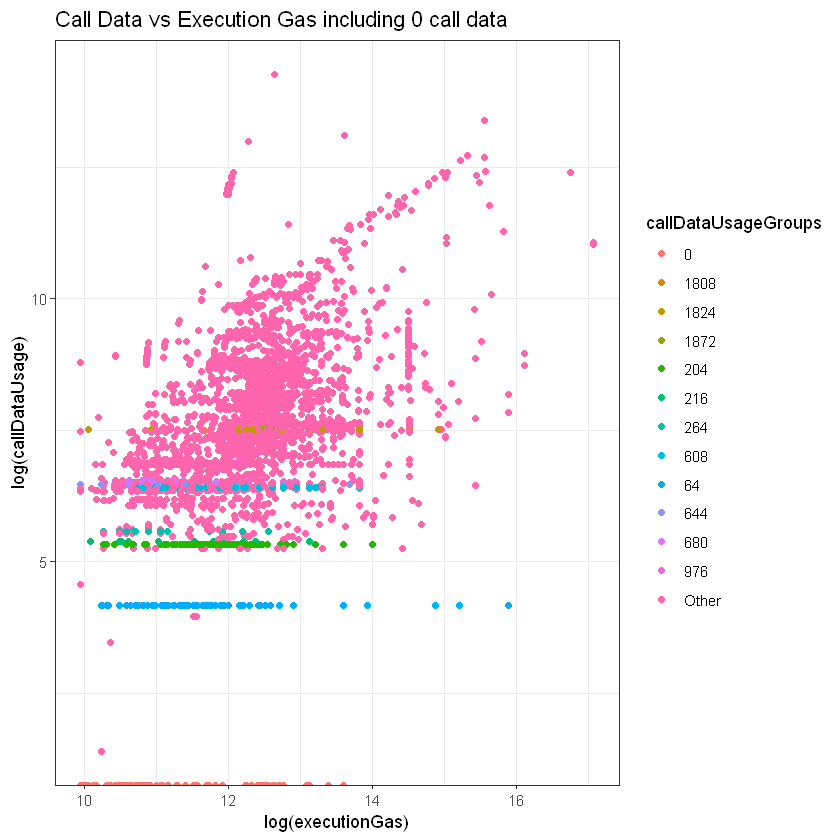

In [139]:
ggplot(df)  + 
  geom_point(aes(x = log(executionGas), y = log(callDataUsage),color=callDataUsageGroups)) +theme_bw()+ ggtitle("Call Data vs Execution Gas including 0 call data")

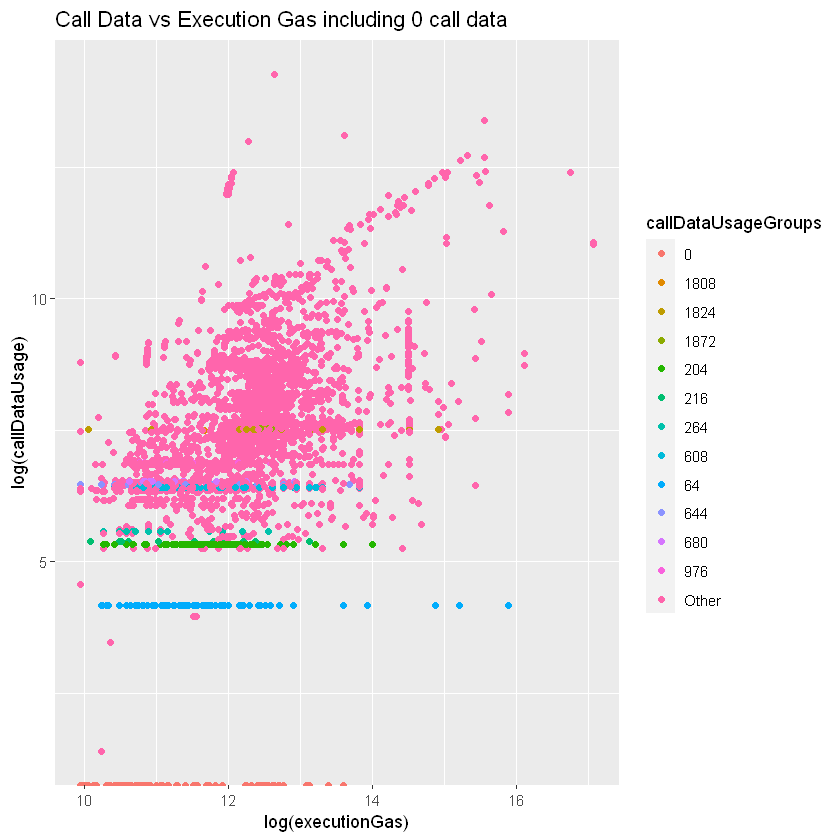

In [140]:
ggplot(df)  + 
  geom_point(aes(x = log(executionGas), y = log(callDataUsage),color=callDataUsageGroups)) + ggtitle("Call Data vs Execution Gas including 0 call data")

In [141]:
group_callData <- function(x){
    if (x==0){
        return('0')
    }else if (x==64){
        return('64')
    }else if (x==204){
        return('204')
    }else if (x==264){
        return('264')
    }else if (x==608){
        return('608')
    }else if (x==680){
        return('680')
    }else if (x==976){
        return('976')
    }else if (x==1824){
        return('1824')
    }else{
        return('Other')      
    }
}

In [142]:
df$callDataUsageGroups<-as.factor(sapply(df$callDataUsage,group_callData))

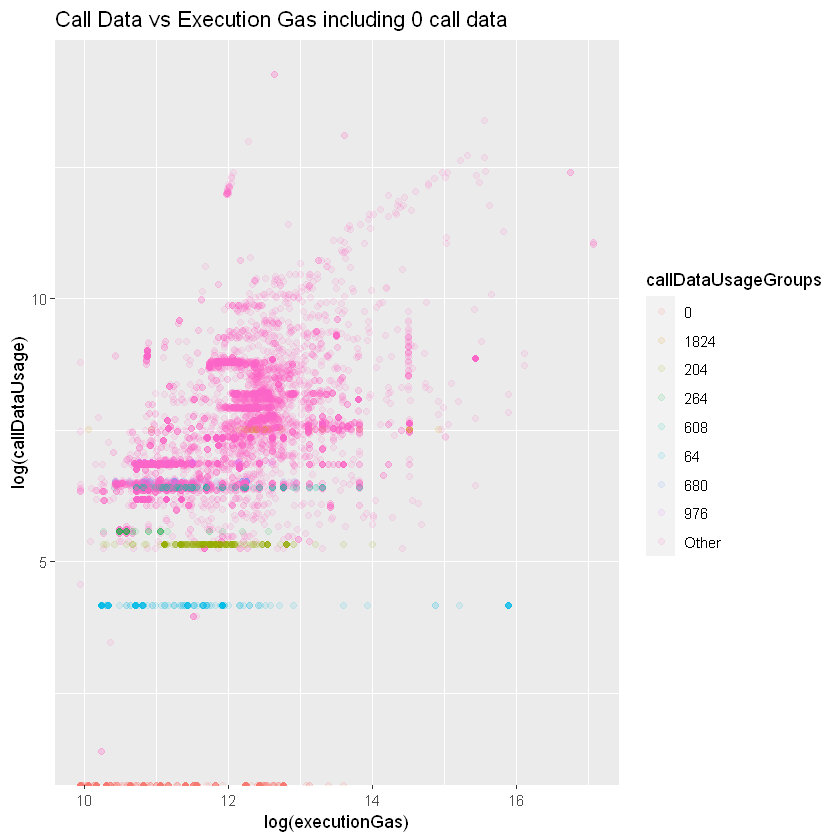

In [143]:
ggplot(df)  + 
  geom_point(aes(x = log(executionGas), y = log(callDataUsage),color=callDataUsageGroups),alpha=0.1) + ggtitle("Call Data vs Execution Gas including 0 call data")

In [144]:
p <- ggplot(df)  + geom_point(aes(x = log(executionGas), y = log(callDataUsage),color=callDataUsageGroups),alpha=0.1)

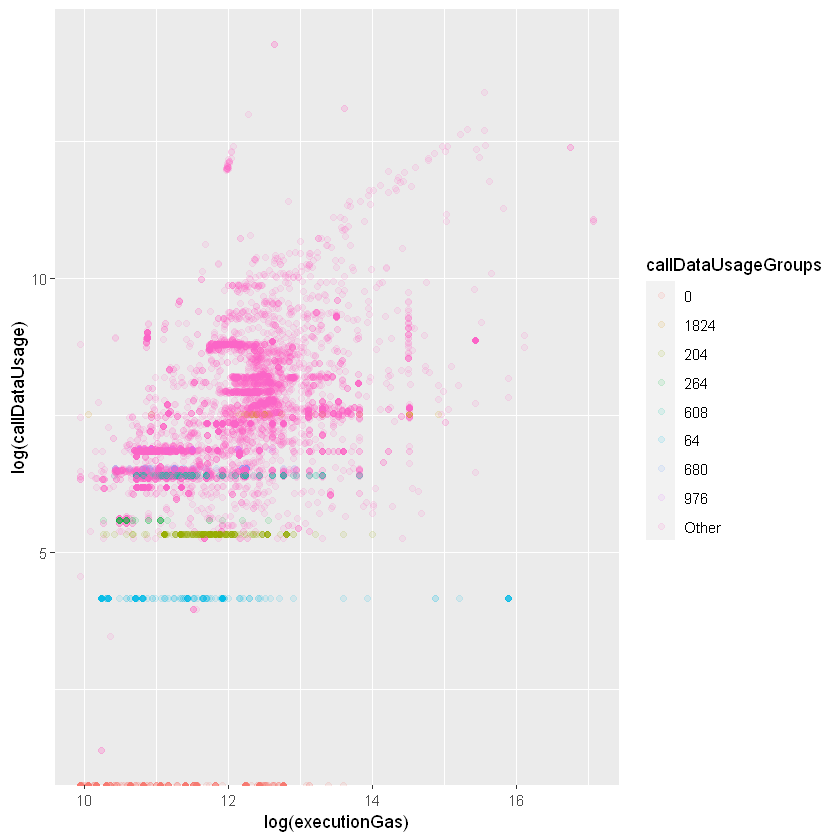

In [146]:
p

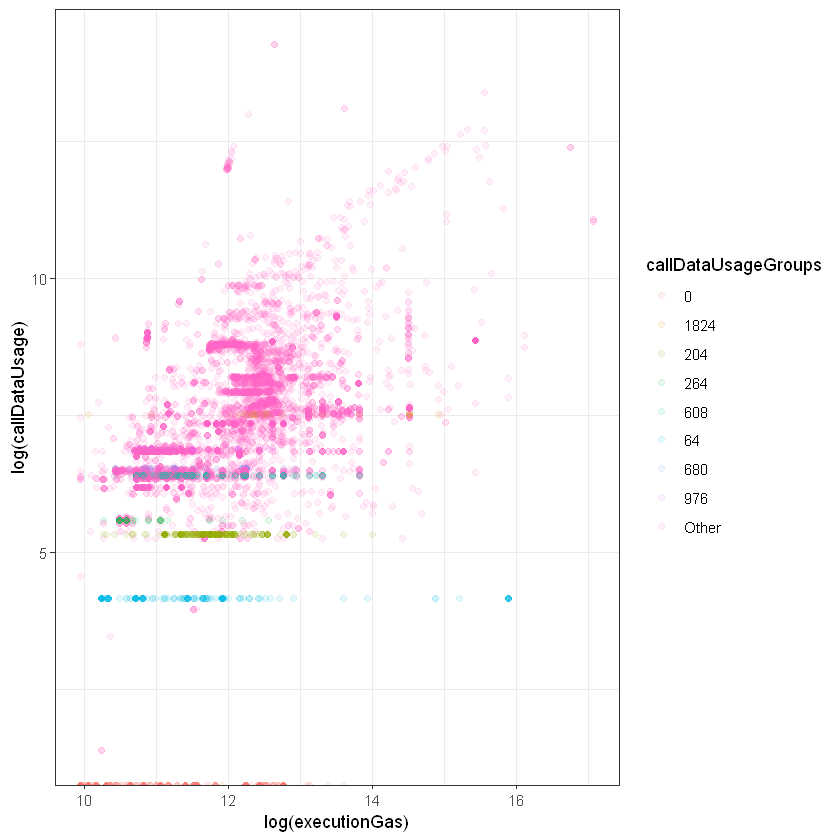

In [147]:
p + theme_bw()

In [11]:
group_callData <- function(x){
    if (x==0){
        return('0')
    }else if (x==64){
        return('64')
    }else if (x==204){
        return('204')
    }else if (x==264){
        return('264')
    }else if (x==608){
        return('608')
    }else if (x==680){
        return('680')
    }else if (x==976){
        return('976')
    }else if (x==1688){
        return('1688')
    }else if (x==1824){
        return('1824')
    }else{
        return('Other')      
    }
}

In [12]:
df$callDataUsageGroups<-as.factor(sapply(df$callDataUsage,group_callData))

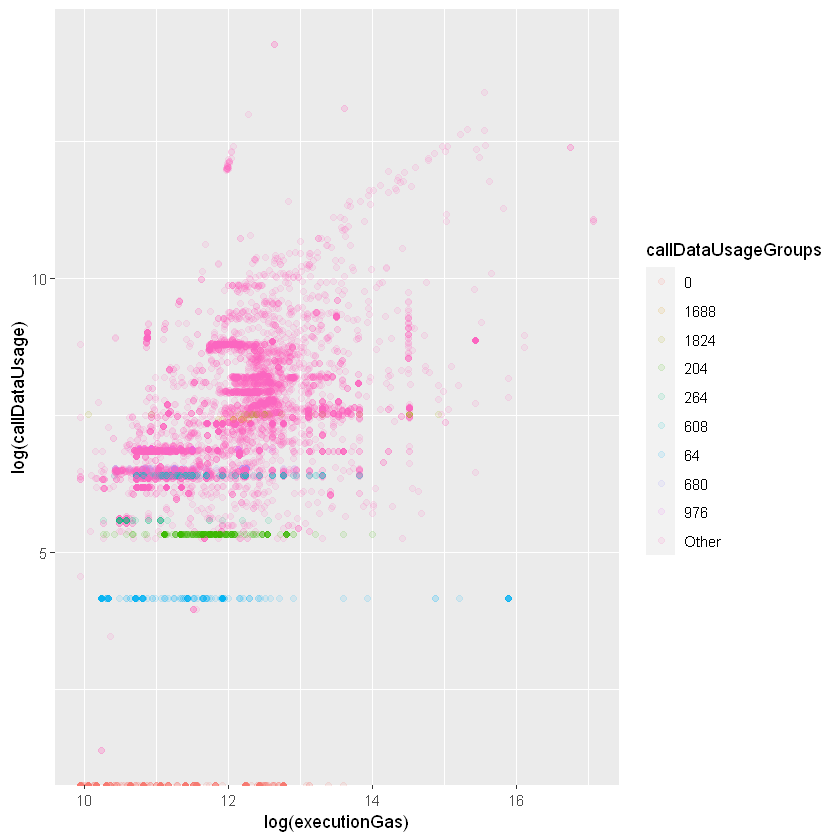

In [150]:
ggplot(df)  + 
  geom_point(aes(x = log(executionGas), y = log(callDataUsage),color=callDataUsageGroups),alpha=0.1) 


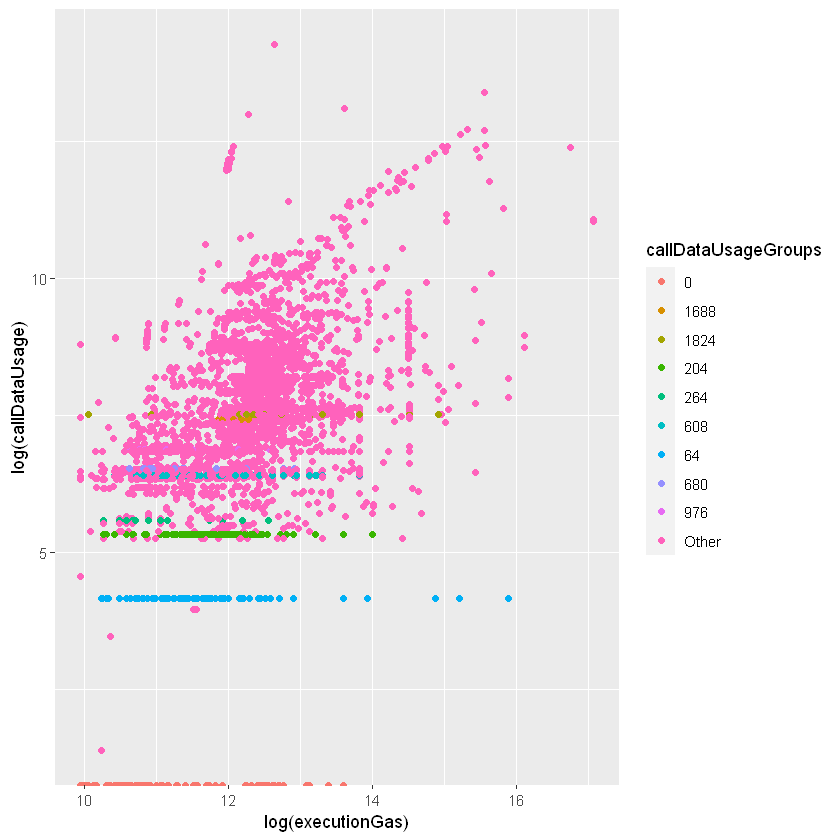

In [151]:
ggplot(df)  + 
  geom_point(aes(x = log(executionGas), y = log(callDataUsage),color=callDataUsageGroups)) 


In [152]:
p <- ggplot(df)  + geom_point(aes(x = log(executionGas), y = log(callDataUsage),color=callDataUsageGroups),alpha=0.05)

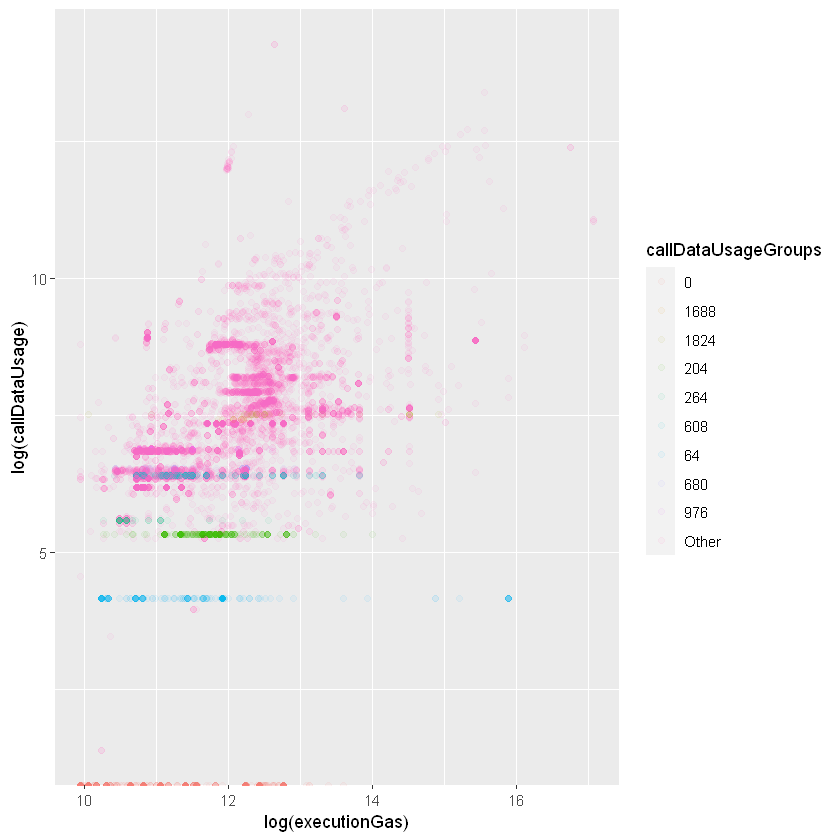

In [153]:
p

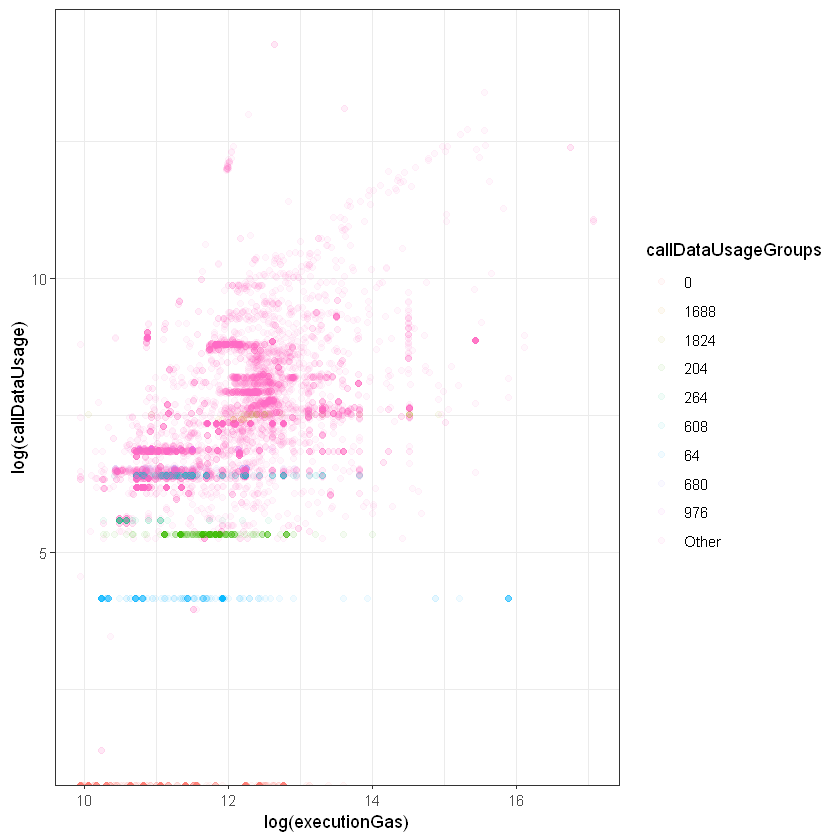

In [154]:
p + theme_bw()

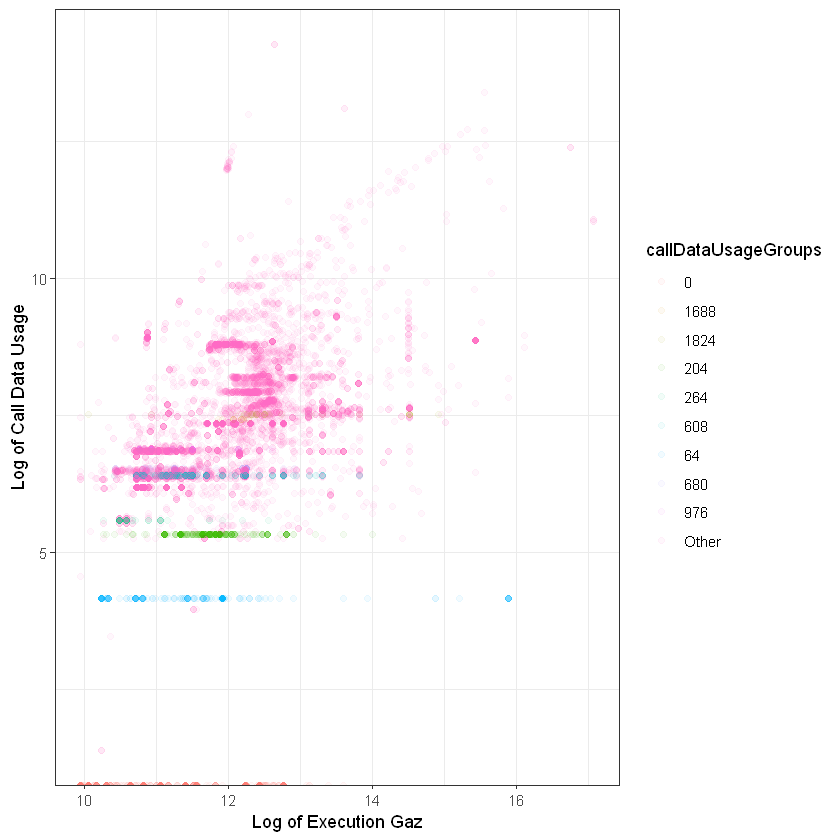

In [155]:
p + theme_bw()+labs(y= "Log of Call Data Usage", x = "Log of Execution Gaz") 

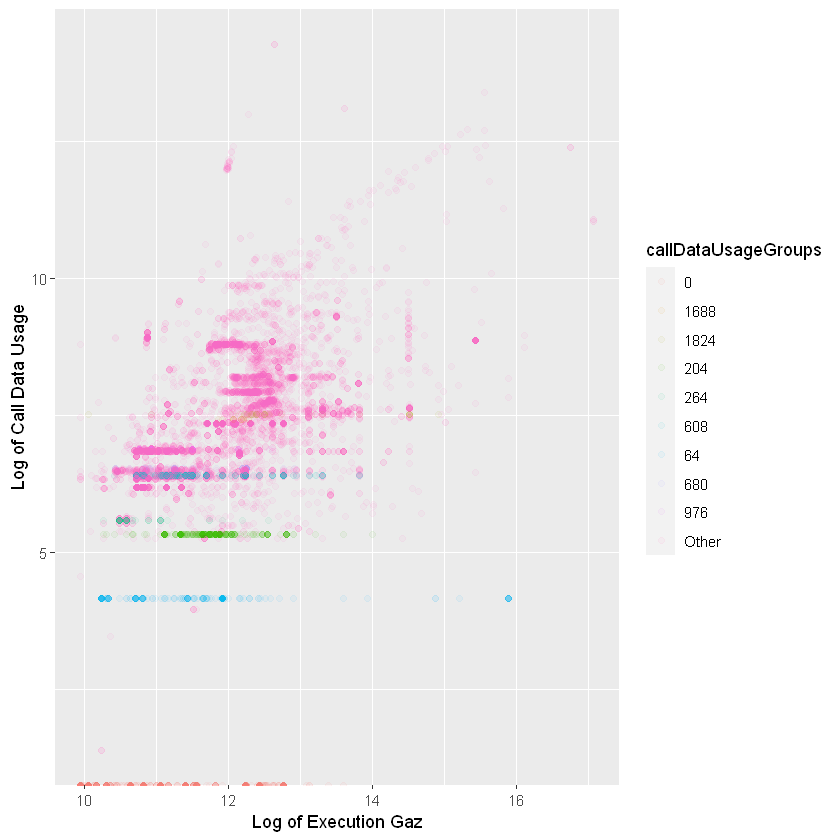

In [156]:

p +labs(y= "Log of Call Data Usage", x = "Log of Execution Gaz") 

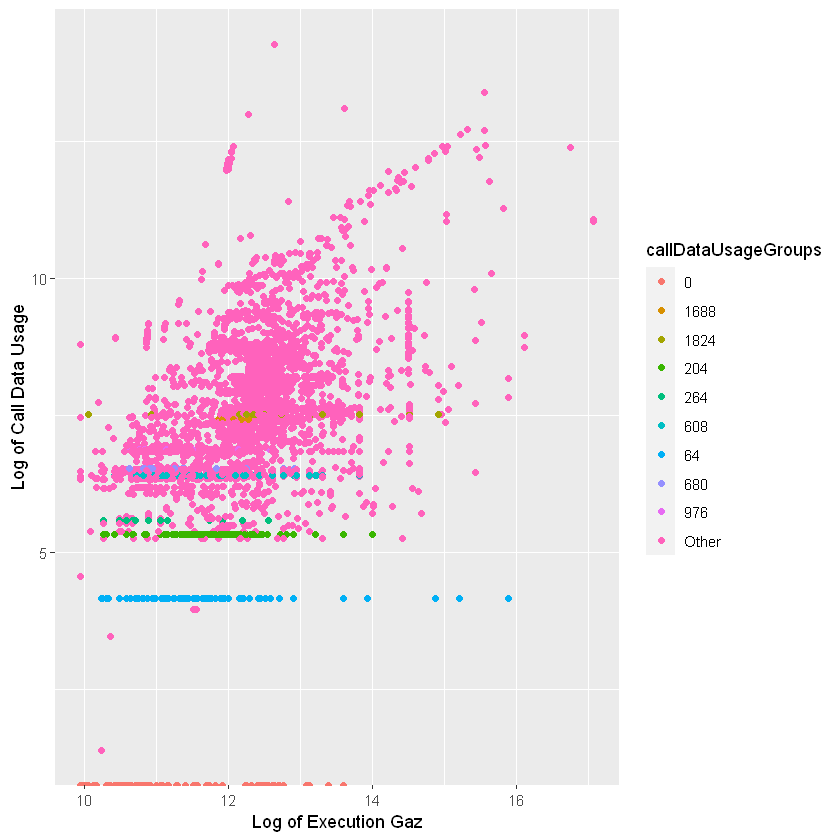

In [157]:
ggplot(df)  + 
  geom_point(aes(x = log(executionGas), y = log(callDataUsage),color=callDataUsageGroups)) +labs(y= "Log of Call Data Usage", x = "Log of Execution Gaz")


In [114]:
df[df$executionGas<=exp(15) & (df$executionGas>=exp(14)),]

,blockNumber,gas,gasPrice,executionGas,callDataUsage,callDataLength,nonce,to,from,callDataGroups
,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<fct>
205,15627833,2000000,9442300698,1994912,5088,1226,171030,9.694999e+47,6.861668e+47,Other
206,15627833,2000000,9442300698,1992040,7960,1738,171031,9.694999e+47,6.861668e+47,Other
263,15627834,3000000,12786835289,2996848,3152,414,6930,1.081367e+48,6.530022e+45,Other
439,15627834,2000000,8392746618,1997940,2060,522,401,6.973232e+47,1.103982e+48,Other
440,15627834,2000000,8392746618,1997940,2060,522,474,6.973232e+47,1.155603e+48,Other
454,15627834,1630468,7945915429,1628840,1628,522,24,9.060080e+47,1.070803e+48,Other
580,15627836,2566460,7626271220,2545960,20500,5962,2054,1.064408e+48,1.048023e+48,Other
631,15627836,1872500,9595077606,1834212,38288,9162,38595,8.231436e+47,1.331411e+48,Other
810,15627838,2000000,11000000000,1993460,6540,1874,7754,9.743344e+46,1.318989e+48,Other


In [115]:
df[df$executionGas==1997940,]

,blockNumber,gas,gasPrice,executionGas,callDataUsage,callDataLength,nonce,to,from,callDataGroups
,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<fct>
439,15627834,2000000,8392746618,1997940,2060,522,401,6.973232e+47,1.103982e+48,Other
440,15627834,2000000,8392746618,1997940,2060,522,474,6.973232e+47,1.155603e+48,Other
2294,15627848,2000000,8773371266,1997940,2060,522,322,6.973232e+47,1.228123e+47,Other
2638,15627850,2000000,8602985852,1997940,2060,522,218,6.973232e+47,3.038198e+47,Other
3521,15627854,2000000,9069751489,1997940,2060,522,402,6.973232e+47,1.103982e+48,Other
4976,15627864,2000000,9044271976,1997940,2060,522,475,6.973232e+47,1.155603e+48,Other
5146,15627866,2000000,8845545559,1997940,2060,522,410,6.973232e+47,1.128080e+48,Other
6513,15627875,2000000,8109069329,1997940,2060,522,403,6.973232e+47,1.103982e+48,Other
6694,15627878,2000000,9116413552,1997940,2060,522,219,6.973232e+47,3.038198e+47,Other


Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."
Saving 6.67 x 6.67 in image


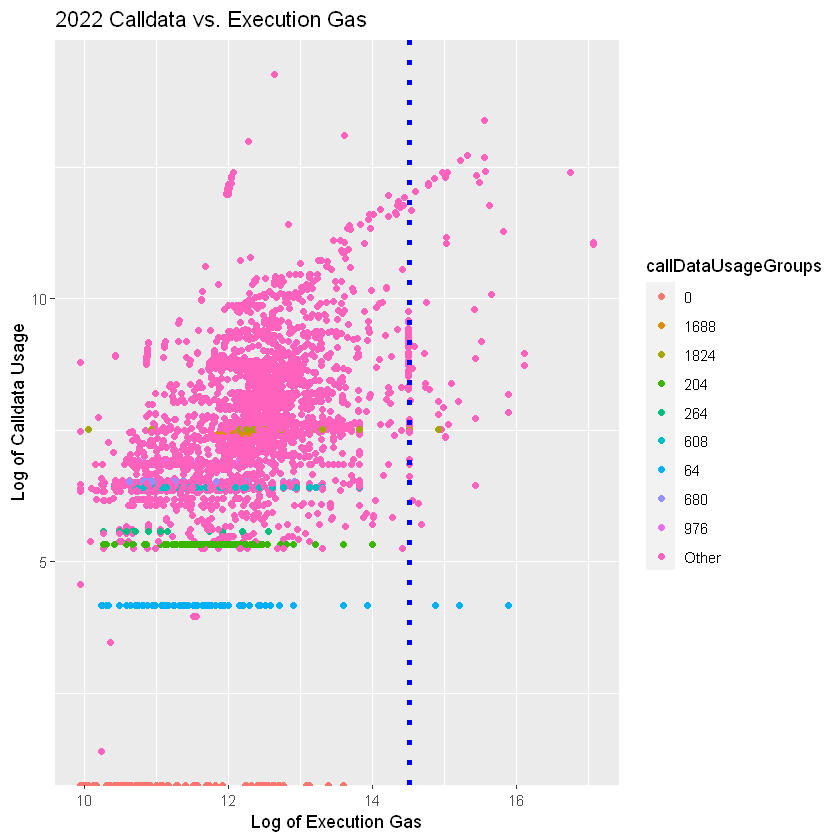

In [13]:
ggplot(df)  +
  geom_point(aes(x = log(executionGas), y = log(callDataUsage),color=callDataUsageGroups)) +labs(y= "Log of Calldata Usage", x = "Log of Execution Gas")+geom_vline(xintercept=log(1997940),linetype="dotted", 
                color = "blue", size=1.5)+ ggtitle("2022 Calldata vs. Execution Gas")
ggsave("plotv1.png")
